# Iris Dataset

* Employ Naive Bayes and other classification techniques
* Develop a conclusion from each technique and compare results among techniques 
* Discuss/Compare all analysis techniques used on the iris dataset over the term (assignments 3 & 5): 
    * which worked best, which worked the least and why?

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
from sklearn.datasets import load_iris
from sklearn.preprocessing import normalize
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.inspection import permutation_importance
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neighbors import NearestCentroid
import re

In [2]:
# Set Plotting Scale Params
plt.rcParams['figure.figsize'] = (16, 12)
sns.set_style('darkgrid')
%matplotlib inline

## Defining Classes/Functions

In [3]:
accuracy_dict = dict()

In [4]:
### Defining Classes/Functions

def classification(method, x_dat, y_dat, **params): 
    
    #fit model
    mod = Pipeline([ ('classify', method(**params)) ])
    mod.fit(x_dat, y_dat)
    y_pred = mod.predict(x_dat)
    
    #print results
    print("Results for {}:".format(method.__name__))
    print(classification_report(y_dat, y_pred,zero_division=0))
    print("Test Accuracy: {}%".format(round(mod.score(x_dat, y_dat)*100,2)))
    short_name = re.findall('[^.]+[\w]', str(method))
    accuracy_dict.update({short_name[-1]:round(mod.score(x_dat, y_dat)*100,2)})
    
    #print confusion matrix
    y_pred_rf = y_pred
    y_true_rf = y_dat
    cm = confusion_matrix(y_true_rf, y_pred_rf)
    f, ax = plt.subplots(figsize =(5,5))
    sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
    plt.xlabel("y_pred_rf")
    plt.ylabel("y_true_rf")
    plt.title('Confusion Matrix')
    plt.show()
    
    # Calculate permutation feature importance
    # permutation feature importance - the decrease in a model score when a single feature value is randomly shuffled
    # thus the drop in the model score is indicative of how much the model depends on the feature
    # (n_jobs=-1 means using all processors)
    try:
        imp = permutation_importance(mod, x_dat, y_dat, n_jobs=-1)
        
        #Generate feature importance plot
        plt.figure(figsize=(12,8))
        importance_data = pd.DataFrame({'feature':x_dat.columns, 'importance':imp.importances_mean})
        sns.barplot(x='importance', y='feature', data=importance_data)
        plt.title('Permutation Feature Importance')
        plt.xlabel('Mean Decrease in F1 Score')
        plt.ylabel('')
        plt.show()
    
    except:
        print('No Feature Importance Available')      
    

## Load Dataset, Explore and Display Features

In [5]:
iris = load_iris()
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
iris_df['target'] = iris_df['target'].replace([0,1,2],['setosa', 'versicolor', 'virginica'])

In [6]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [7]:
iris_df.shape

(150, 5)

In [8]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
iris_df['target'].describe()

count            150
unique             3
top       versicolor
freq              50
Name: target, dtype: object

In [10]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
profile = ProfileReport(iris_df)
profile

Summarize dataset:   0%|          | 0/18 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [12]:
iris_df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


## Split into feature and target data

In [13]:
# Note these x and y values will be used in the first set of classification models
# The second set of classification models uses this y value but a modified x value
x_iris = iris_df.drop(["target"], axis=1)
y_iris = iris_df["target"]

## Classification Models
#### Note: where applicable, random_state=42 in our models sets a seed so that results will be reproducible

## Generative and Discriminative Classifers

* Generative classifiers take in training data and create probability estimates.  The model then uses this probability to make predictions, choosing the most likely class.

* Discriminative classifiers estimate predictions directly, rather than estimate likelihoods. A decision boundary is created that creates a dividing line/plane between instances of one class and instances of another class. New, unseen instances are classified based on which side of the line/plane they fall. In this way, a direct mapping is generated from attributes to class labels.

### Note that this analysis looks at 6 Generative Classifiers, 8 Discriminative Classifiers and 2 Ensemble Techniques

## Generative Models

### Gaussian Naive Bayes Classifier

Results for GaussianNB:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.94      0.94      0.94        50
   virginica       0.94      0.94      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150

Test Accuracy: 96.0%


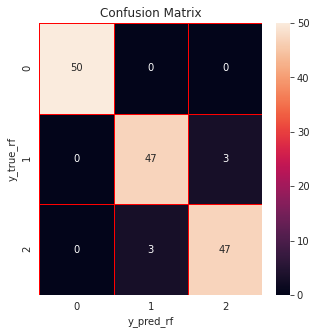

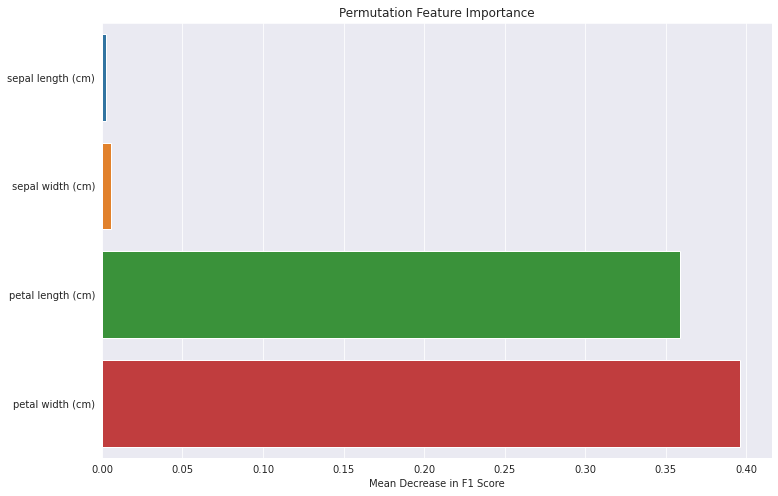

In [14]:
classification(GaussianNB, x_iris, y_iris)

### Multinomial Naive Bayes Classifier

Results for MultinomialNB:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.94      0.92      0.93        50
   virginica       0.92      0.94      0.93        50

    accuracy                           0.95       150
   macro avg       0.95      0.95      0.95       150
weighted avg       0.95      0.95      0.95       150

Test Accuracy: 95.33%


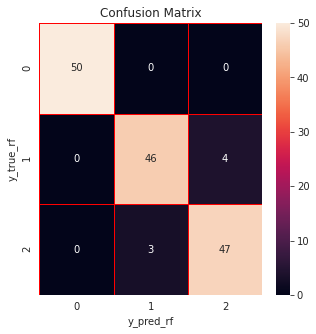

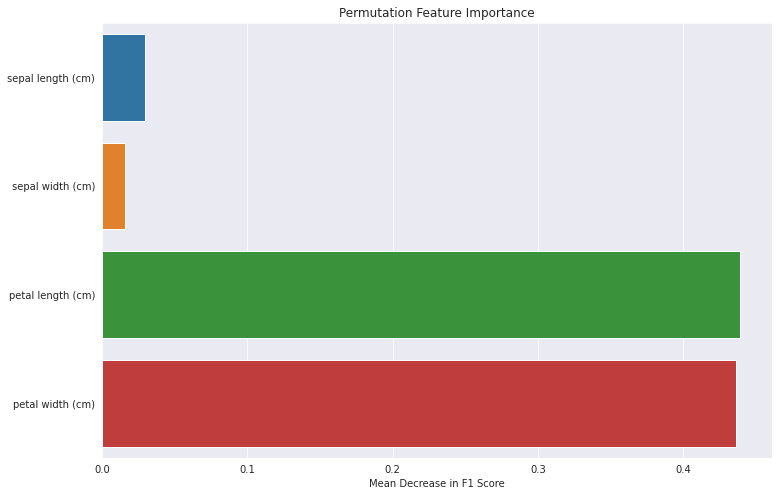

In [15]:
classification(MultinomialNB, x_iris, y_iris)

### Bernoulli Naive Bayes Classifier

Results for BernoulliNB:
              precision    recall  f1-score   support

      setosa       0.33      1.00      0.50        50
  versicolor       0.00      0.00      0.00        50
   virginica       0.00      0.00      0.00        50

    accuracy                           0.33       150
   macro avg       0.11      0.33      0.17       150
weighted avg       0.11      0.33      0.17       150

Test Accuracy: 33.33%


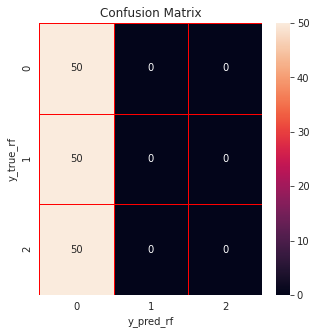

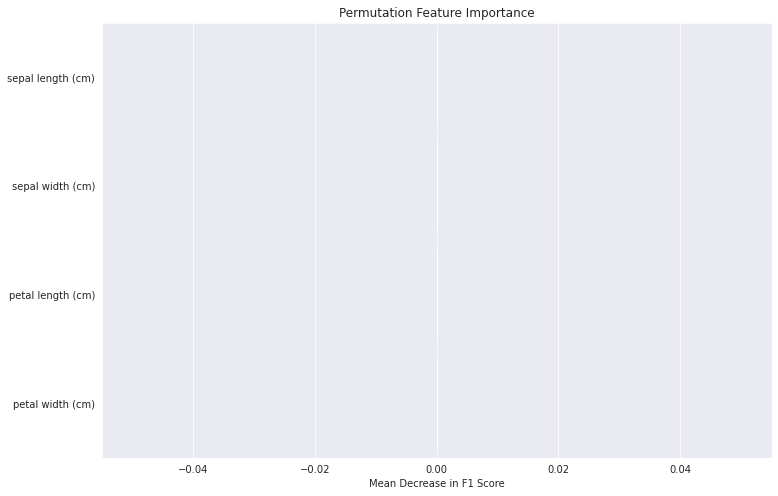

In [16]:
classification(BernoulliNB, x_iris, y_iris)

##### Naive Bayes Classification

A probabilistic classifer, the Naive Bayes approach relies on applying Bayes' Theorem while assuming that features are independent, hence the "Naive". Considering the features to be independent drastically reduces the computational complexity of predicting each output, and in spite of this large simplification the NB classifiers have worked very well in many real-world models. 

Each observation instance in a NB classification is given a probability for each output class, and the highest probability dictates the predicted output class. These probabilities are generated differently for each type of NB classifier:

-**Gaussian** Likelihood of the features is assumed to be Gaussian.  
-**Multinomial** Assumes multinomially distrubuted data, used often in text classification. Distribution parameterized by vectors for each class, and more often a feature (i.e. word or phrase) appears in an input vector it increases the probability given by the dot product of the vector in vs. the parameterized class vector.  
-**Bernoulli** Likelihood of the features is assumed to be distributed according to multivariate Bernoulli distributions. This is appropriate only for binary feature values so it's no surprise it performed poorly on the Iris dataset.   
-**Categorical** assumes encoded input variables, and estimates a categorical distribution.  
-**Complement** Similar to Multinomial, but uses statistics from the complement of each class to compute model weights automatically

###### Advantages  
- Quick run time given independence assumption
- When independence assumption is true performs exceptionally
- Well suited for categorical models or text classification

###### Disadvantages
- Independence assumption rarely ever true
- In situations where a category is in test or training but not both, the model will only assign a probability of 0 and be unable to make a prediciton. This is known as Zero Frequency, but this can be solved with a smoothing technique called Laplace Estimation

### Linear Discriminant Classifier

Results for LinearDiscriminantAnalysis:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.98      0.96      0.97        50
   virginica       0.96      0.98      0.97        50

    accuracy                           0.98       150
   macro avg       0.98      0.98      0.98       150
weighted avg       0.98      0.98      0.98       150

Test Accuracy: 98.0%


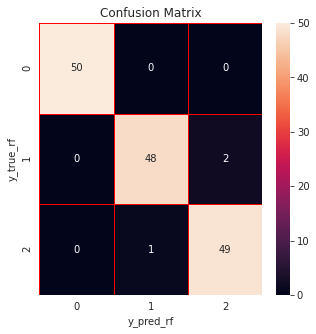

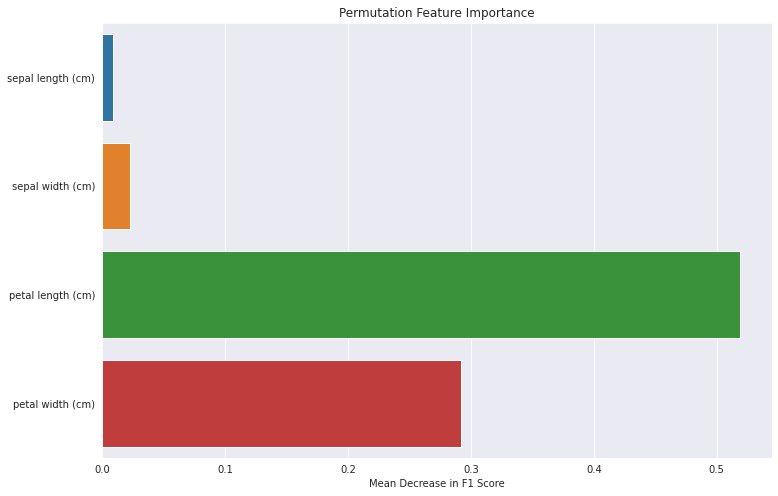

In [17]:
classification(LinearDiscriminantAnalysis, x_iris, y_iris)

##### Linear Discriminant Analysis Classifier
A classifier with a linear decision boundary, generated by fitting class conditional densities to the data and using Bayes’ rule. The model fits a Gaussian density to each class, assuming that all classes share the same covariance matrix. 

##### Advantages
- model is interpretable
- simplicity makes prediction easy

##### Disadvantages
- if the distribution’s mean values are shared between the classes, Linear Discriminant Analysis cannot find a new linearly separable axis

_More info:_https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html

### Quadratic Discriminant Analysis

Results for QuadraticDiscriminantAnalysis:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.98      0.96      0.97        50
   virginica       0.96      0.98      0.97        50

    accuracy                           0.98       150
   macro avg       0.98      0.98      0.98       150
weighted avg       0.98      0.98      0.98       150

Test Accuracy: 98.0%


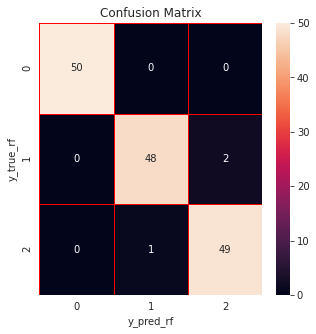

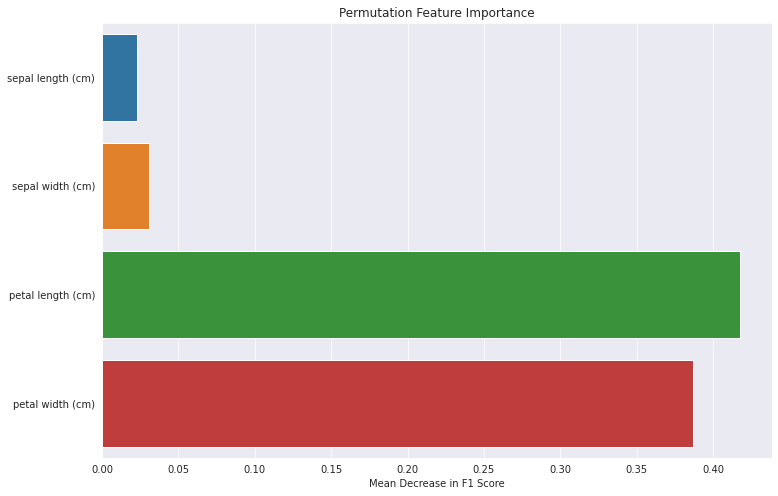

In [18]:
classification(QuadraticDiscriminantAnalysis, x_iris, y_iris)

##### Quadratric Discriminant Analysis Classifier
A classifier with a quadratic decision boundary, generated by fitting class conditional densities to the data and using Bayes’ rule.  The model fits a Gaussian density to each class. The only difference between QDA and LDA is that LDA assumes a shared covariance matrix for the classes and QDA allows class-specific covariance matrices. 

##### Advantages
- tends to fit the data better than LDA

##### Disadvantages
- more parameters to estimate - more complex model

_More info:_https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis.html

### Gaussian Process Classifier

Results for GaussianProcessClassifier:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.96      0.96      0.96        50
   virginica       0.96      0.96      0.96        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150

Test Accuracy: 97.33%


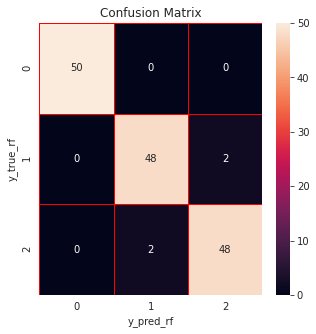

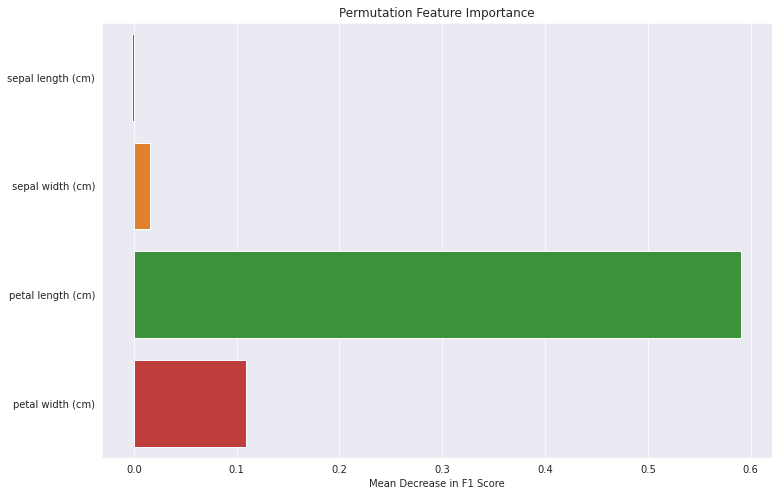

In [19]:
classification(GaussianProcessClassifier, x_iris, y_iris, random_state=42)

##### Gaussian Process Classifier 

The Gaussian processes are used for class probabilities; a weight is placed on a latent nuisance function 'f' (meaning that the values in this function are not observed and are not relevant in themselves) and then goes through a link function to obtain the probability. It is assumed that the GP prior mean is zero, and the covariance comes from a kernel object. Multi-class prediction can be performed by using one-versus-rest classification or one-versus-one based training and prediction. One-versus-one is potentially computationally cheaper, but only produces probabilities, not probability estimates. 

##### Advantages
- versatile in terms of kernels
- probabilistic prediction can be used for determining confidence intervals and refitting
- predictions interpolate the observations

##### Disadvantages
- uses all features and information to make decisions; not sparse
- inefficient in high dimensional spaces

_More info:_ https://scikit-learn.org/stable/modules/gaussian_process.html#gaussian-process

## Discriminative Models

### Decision Tree Classifier

Results for DecisionTreeClassifier:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       1.00      1.00      1.00        50
   virginica       1.00      1.00      1.00        50

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150

Test Accuracy: 100.0%


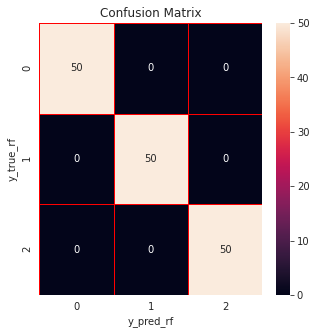

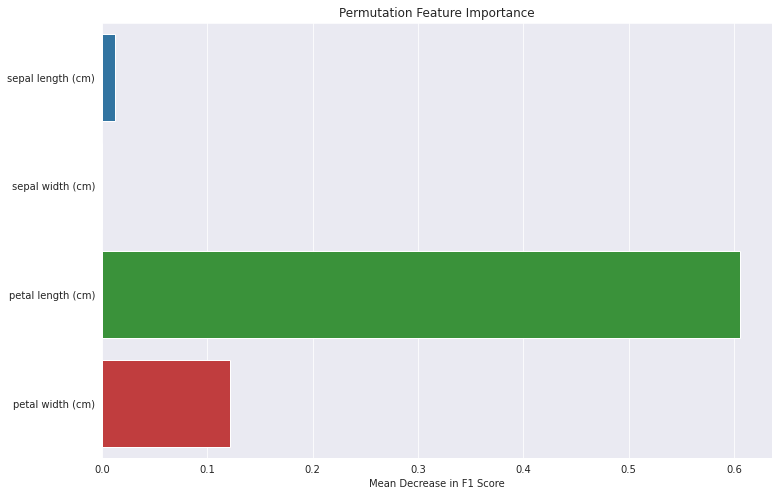

In [20]:
classification(DecisionTreeClassifier, x_iris, y_iris, random_state=42)

#### Decision Trees 

Decision Trees are non-parametric (not based on assumptions, any distribution) models that are used for classification or regression. THey function by splitting the source set of data into subsets based on which variable splits the data "best". Different algorithms use different metrics for determining which is the best split:

-**Information Gain** roughly equates to the reduction of the entropy at each node. At each node Information Gain is maximized by attempting to choose the split that results in the most consisten child subsets.  
-**Gini Impurity** measures how often a radnomly chosen element from the set wiuld be incorrectly labeled if it was randomly labeled according to the distribution of labels in the subset. This is minimized, rather than maximized, and also related to entropy in the system.  
-**Variance Reduction** often used when target is continous, is the total reduction of the vasriance of the target variable at each split.  
-**Measure of Goodness** an older metric, this seeks to optimize the balance of a candidate split's capacity to create pure children with its capacity to create equally-sized children.   

###### Advantages  
- Simple to read and understand
- Works for continous and categorical outputs
- Requires little data preperation and can be used on different distributions
- Validation through statistical tests  

###### Disadvantages
- Some data may create overly complex trees
- Can be unstable as slight variations in data can cause big changes (fixed by Random Forrest)

More info: https://scikit-learn.org/stable/modules/tree.html

### C-Support Vector Classifier

Results for SVC:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.96      0.96      0.96        50
   virginica       0.96      0.96      0.96        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150

Test Accuracy: 97.33%


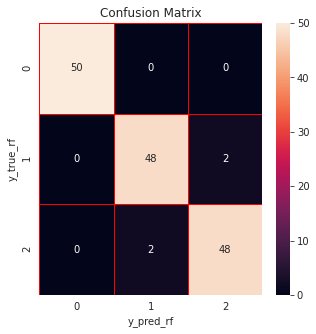

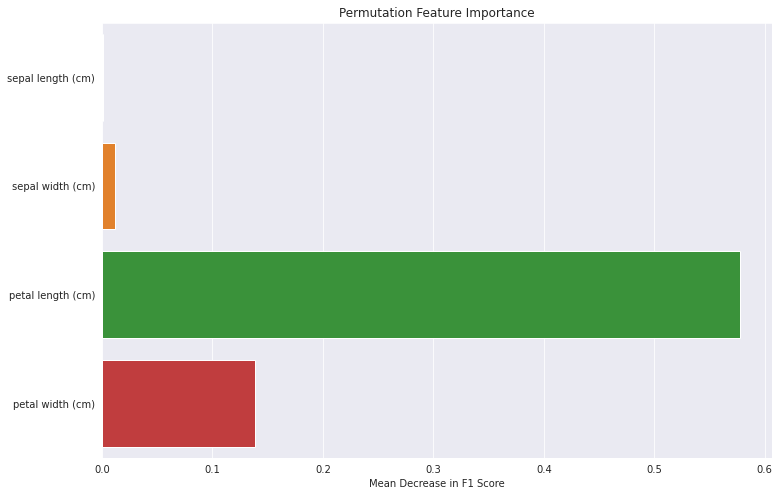

In [21]:
classification(SVC, x_iris, y_iris, random_state=42)

#### Support Vector Machines

Support Vector Machines construct a series of hyperplanes in number equal to the amount of input variables included in the model. Each of these hyperplanes is a support vector, and they are generally created by creating hyperplanes that have the largest distance to the nearest training data point of each class. These hyperplanes will then "contain" or hold each member of the class, and further input data will be classified by whichever sub-section of support vectors it fits in.

###### Advantages  
- Great for high dimensional spaces or sets with many features
- Only uses a subset of training points in generating the support vectors, so memory efficient

###### Disadvantages
- Does not work well in situations with more features than samples
- Uses a computationally expensive five-fold cross-validation, and can cost a lot of run time

###### Other SVCs
- *NuSVC*
- *LinearSVC*

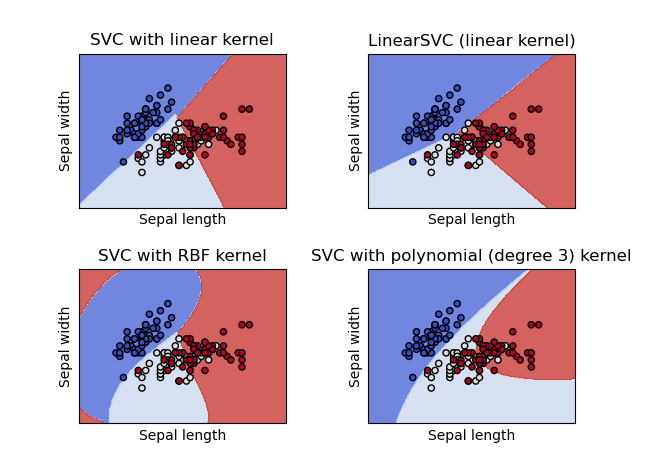

*More Info:* https://scikit-learn.org/stable/modules/svm.html

### K Neighbors Classifier

Results for KNeighborsClassifier:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.96      0.94      0.95        50
   virginica       0.94      0.96      0.95        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150

Test Accuracy: 96.67%


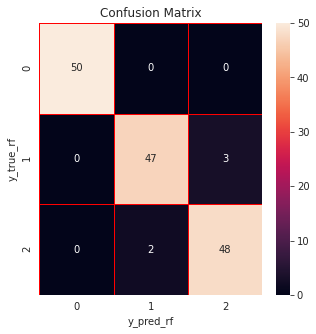

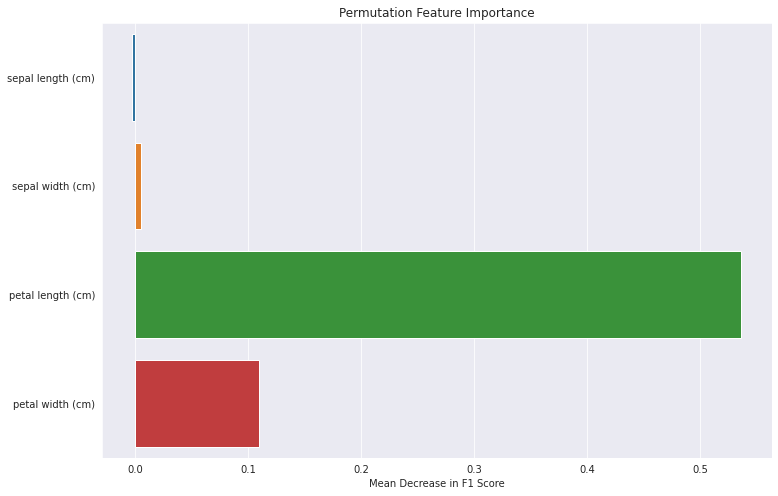

In [22]:
classification(KNeighborsClassifier, x_iris, y_iris, n_neighbors=5)

#### K-Nearest Neighbors

Another non-parametric algorithm, KNN as it is colloquially known, imagines each input instance in a hyperdimesional space of dimensions equal to number of input variables. It calculates the distance of an input variable to each of the *k* number of nearest neighbors, and then has each neighbor "vote" to decide the output classification. For this reason, it is reccommended in some packages to have an odd number *k* to avoid ties.

###### Advantages  
- Intuitive and easy to implement with only *k* and distance function as possible inputs.
- Lazy learner, as it does not learn during the training period and more training data can be added easily

###### Disadvantages
- Does not work well with large datasets or datasets with high dimensions as these will rapidly increase the complexity of the distance calculations and runtime 

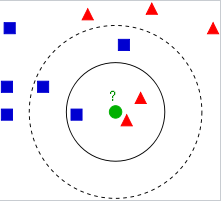  
*Example of a circle input instance classifying as a triangle with 3 neighbors, but a square with 5 neighbors*

*More Info:* https://scikit-learn.org/stable/modules/neighbors.html

### Radius Neighbors Classifier

Results for RadiusNeighborsClassifier:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.94      0.98      0.96        50
   virginica       0.98      0.94      0.96        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150

Test Accuracy: 97.33%


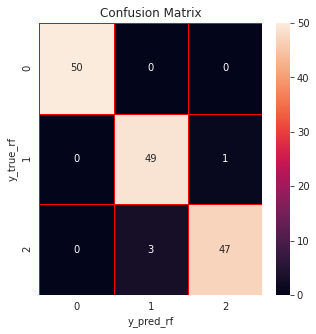

No Feature Importance Available


In [23]:
classification(RadiusNeighborsClassifier, x_iris, y_iris, n_jobs=50)

##### Radius Neighbors Classifier 

Radius Neighbors Classifier is a type of Nearest Neighbors classifier where the radius "r" value is designated by the user. This is used for implementing training based on the number of neighbors within the radius of the training objects.

_Same Advantages and Disadvantages as K-Nearest Neighbor._

### Nearest Centroid Classifier

Results for NearestCentroid:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.87      0.92      0.89        50
   virginica       0.91      0.86      0.89        50

    accuracy                           0.93       150
   macro avg       0.93      0.93      0.93       150
weighted avg       0.93      0.93      0.93       150

Test Accuracy: 92.67%


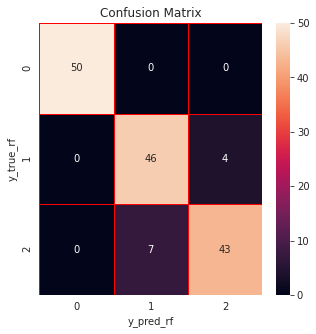

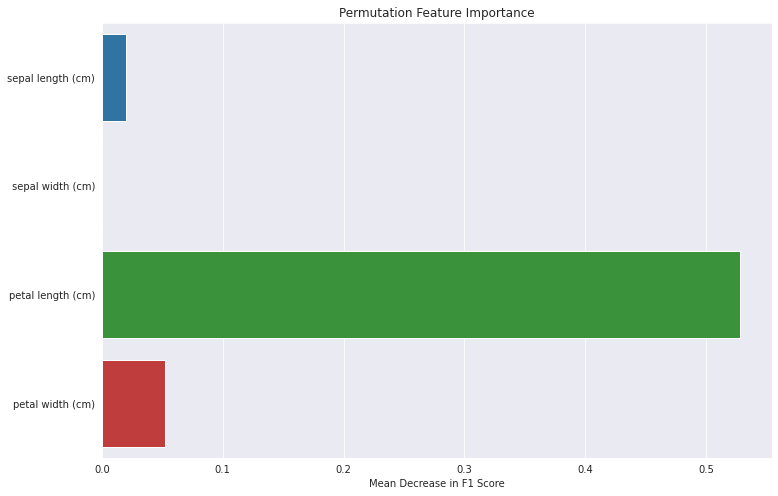

In [24]:
classification(NearestCentroid, x_iris, y_iris)

##### Nearest Centroid Classifier

The nearest centroid classifier defines each class by a single typical representative from the class, the center of each. No parameters are necessary for this algorithm, and it is similar to the KMeans labeling phase. The name of this algorithm is pretty self-explanatory; it's a solid baseline classifier.

##### Advantages
- Simple 
- Easy to use 

##### Disadvantages
- Does not do well with non-convex classes
- Does not do well when classes do not have different variances, because equal variance in all dimensions is assumed

_More info:_ https://scikit-learn.org/stable/modules/neighbors.html#nearest-centroid-classifier

### Logistic Regression Classifier

Results for LogisticRegression:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.98      0.94      0.96        50
   virginica       0.94      0.98      0.96        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150

Test Accuracy: 97.33%


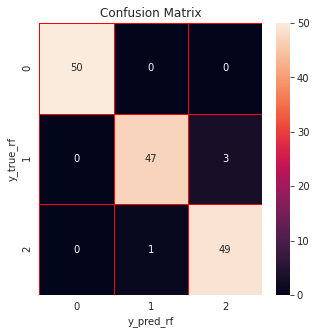

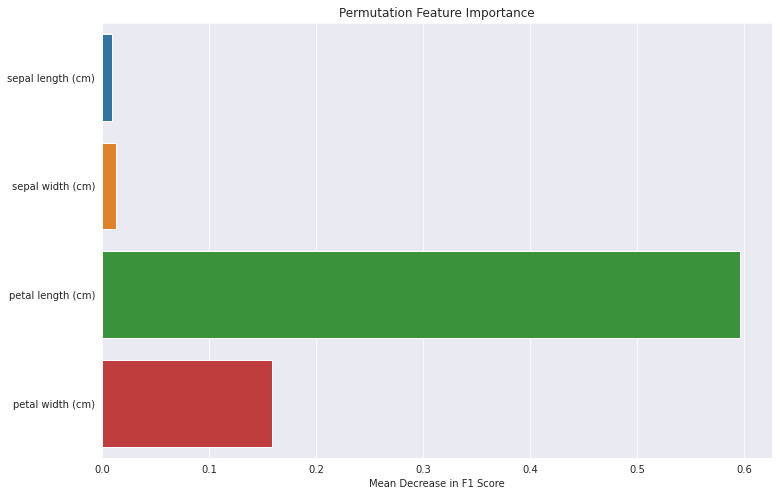

In [25]:
classification(LogisticRegression, x_iris, y_iris, solver = 'newton-cg', random_state=42) 

#### Logistic Regression

The cousin of linear regression, logistic regression is the classification counterpart to the popular continous algorithm. It maps predicted values from input variables to a probability that an observation belongs to a class. The probabilities are derived from the "Sigmoid Function" that involves as the name suggests a logorithmic transformation of the observation feature values.

###### Advantages  
- Simple, intuitive, and gives, importance of features, and versitile.
- Quick to run

###### Disadvantages
- Can overfit on high dimensional datasets
- Non-linear data will result in a poor or misleading model
- Prone to errors when multicollinearity exists

*More Info:* https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

### Neural Network Multi-layer Perceptron Classifier

Results for MLPClassifier:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.98      0.98      0.98        50
   virginica       0.98      0.98      0.98        50

    accuracy                           0.99       150
   macro avg       0.99      0.99      0.99       150
weighted avg       0.99      0.99      0.99       150

Test Accuracy: 98.67%


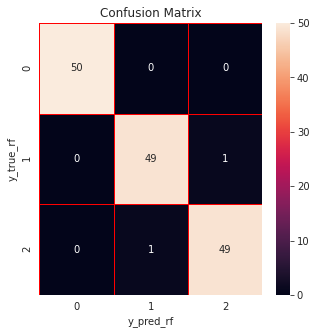

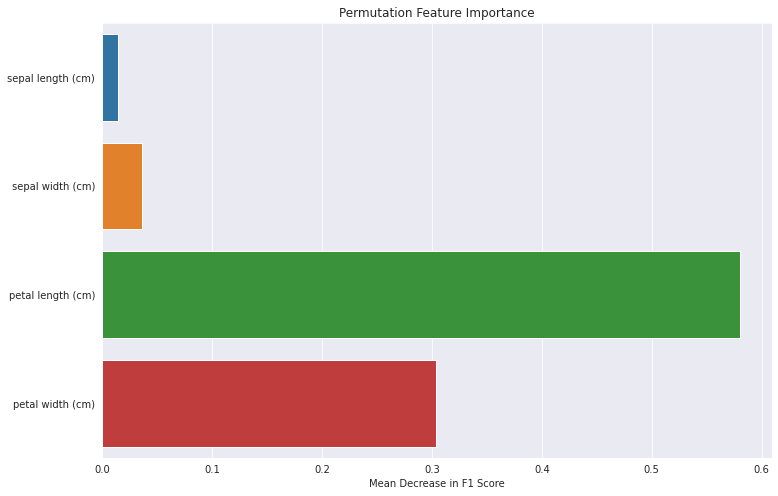

In [26]:
classification(MLPClassifier, x_iris, y_iris, random_state=42, max_iter=600, solver='lbfgs')

##### Neural Network Multi-layer Perceptron Classifier
This is a supervised learning algorithm with multiple possible hidden nonlinear layers between input and output. The algorithm is trained on features and can learn a nonlinear classification for them using the weights of the hidden layers on each feature to reduce down to the desired number of output features. 

##### Advantages
- online function capability
- compatible with nonlinear functions

##### Disadvantages
- sensitive to feature scaling
- hyperparameters must be adjusted
- if more than one local minimum exists, some hidden layers may have a non-convex loss function

_More info:_ https://scikit-learn.org/stable/modules/neural_networks_supervised.html?highlight=neural%20network%20perceptron

### Passive Aggressive Classifier

Results for PassiveAggressiveClassifier:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.96      0.92      0.94        50
   virginica       0.92      0.96      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150

Test Accuracy: 96.0%


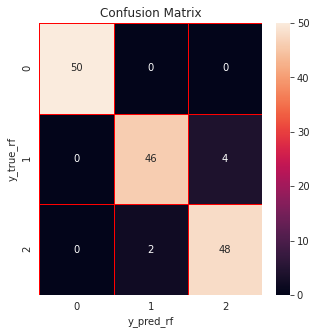

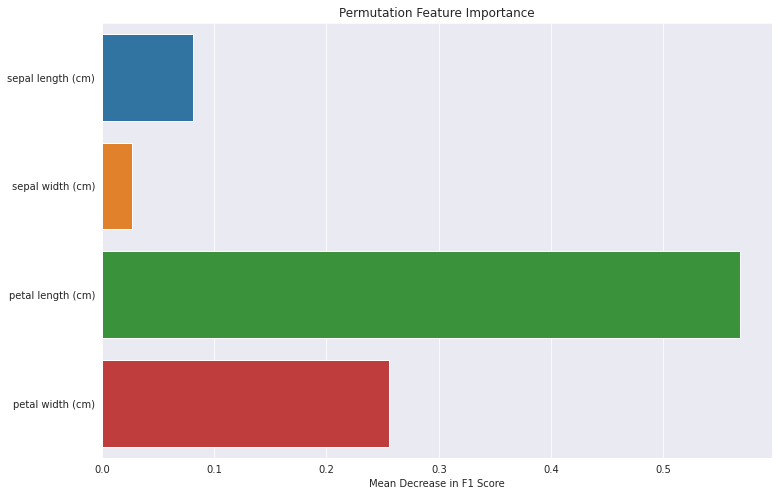

In [27]:
classification(PassiveAggressiveClassifier, x_iris, y_iris, random_state=42)

##### Passive Aggressive Classifier 
The most important item to note about Passive Aggressive classifiers is that they incorporate real-time data input; they are "online" algorithms because the data is inputted sequentially rather than in batches. If the prediction is correct, no changes are performed on the model (passive). If the prediction is incorrect, then the model is penalized/changed to incorporate the new data (aggressive). This classifier takes a parameter "C" which denotes the amount of penalization when the model is incorrect. 

##### Advantages
- Able to intake huge amounts of data 
- An online function

##### Disadvantages
- The end result of the classifier is heavily influenced by the order in which the data is fed to the classifier

_More info:_ https://scikit-learn.org/stable/modules/linear_model.html#passive-aggressive 

## Ensemble Models

### Random Forest Classifier

Results for RandomForestClassifier:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       1.00      1.00      1.00        50
   virginica       1.00      1.00      1.00        50

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150

Test Accuracy: 100.0%


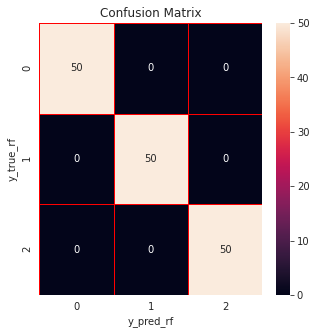

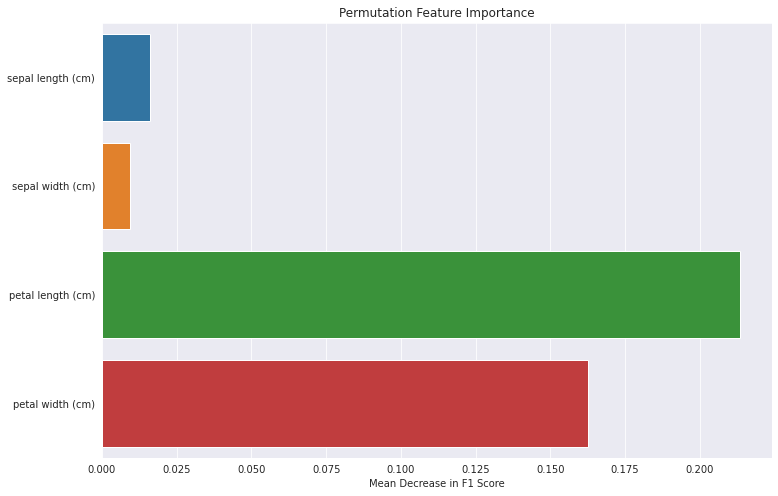

In [28]:
# Note: random_state=42 sets a seed so the results are reproducible
classification(RandomForestClassifier, x_iris, y_iris, n_estimators=100, random_state=42)  

##### Random Forest Classifier 

A random forest is an ensemble technique that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.  

##### Advantages
- handles missing values well
- can handle big data
- low risk of overfitting 

##### Disadvantages
- cannot predict beyond the range of the training data

More Info: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

### Voting Classifier

Results for VotingClassifier:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.96      0.94      0.95        50
   virginica       0.94      0.96      0.95        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150

Test Accuracy: 96.67%


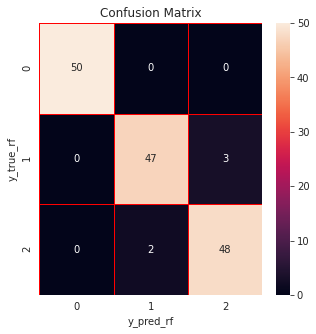

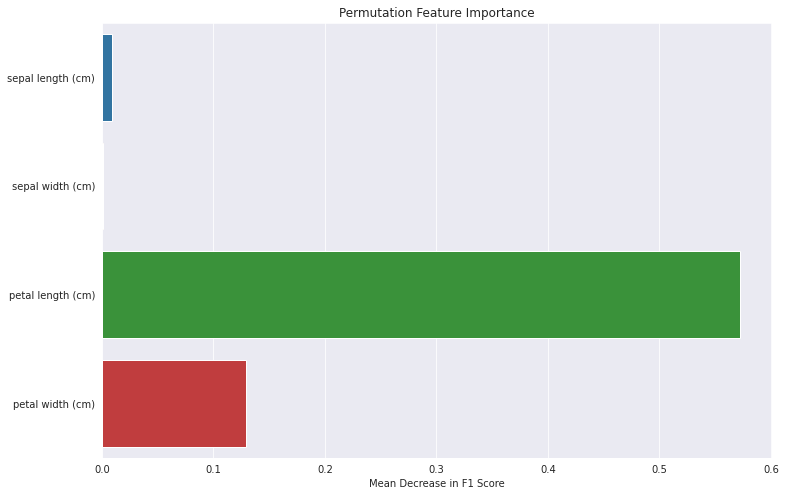

In [29]:
clf1 = LogisticRegression(multi_class='multinomial', random_state=42)
clf2 = KNeighborsClassifier(n_neighbors=5)
clf3 = GaussianNB()
estimators=[('lr', clf1), ('kn', clf2), ('gnb', clf3)]

classification(VotingClassifier, x_iris, y_iris, n_jobs=50, estimators = estimators)

##### Voting Classifier 

The voting classifier uses many different machine learning algorithms to determine what each algorithm would choose, and then combines each "vote" and makes a decision based on majority (hard vote) or average predicted probabilities (soft vote). The **Majority/Hard vote** type simply makes choices based on what the majority of classifiers choose; if there is a tie, the class is chosen in ascending order. The **Weighted Average Probabilities/Soft vote** type uses weights that are assigned to each classifier type. The probabilities of the classes are multiplied by the classifier weights, and averaged; then the class with the maximum probability is what is chosen. 

##### Advantages
- Can be used with classifiers that perform equally well in order to balance out any individual weaknesses

##### Disadvantages
- Can be computationally heavy

_More info:_ https://scikit-learn.org/stable/modules/ensemble.html#voting-classifier 

## Evaluate Classification Technique Results

In [30]:
accuracy_df = pd.DataFrame(accuracy_dict.items(), columns=["Method", "Accuracy"]) 
accuracy_df

,Method,Accuracy
0,GaussianNB,96.00
1,MultinomialNB,95.33
2,BernoulliNB,33.33
3,LinearDiscriminantAnalysis,98.00
4,QuadraticDiscriminantAnalysis,98.00
5,GaussianProcessClassifier,97.33
6,DecisionTreeClassifier,100.00
7,SVC,97.33
8,KNeighborsClassifier,96.67
9,RadiusNeighborsClassifier,97.33


In [31]:
sorted_df = accuracy_df.sort_values(by='Accuracy', ascending=False)
sorted_df

,Method,Accuracy
6,DecisionTreeClassifier,100.00
14,RandomForestClassifier,100.00
12,MLPClassifier,98.67
3,LinearDiscriminantAnalysis,98.00
4,QuadraticDiscriminantAnalysis,98.00
5,GaussianProcessClassifier,97.33
7,SVC,97.33
9,RadiusNeighborsClassifier,97.33
11,LogisticRegression,97.33
8,KNeighborsClassifier,96.67


## Other Analysis Techniques Employed Throughout the Term

* EDA
* Clustering Techniques (with and without PCA):
    * KMeans
    * Agglomerative
    * DBScan
    * Mean Shift
    
    
Recall from Assignment 5, to evaluate the various clustering techniques, on both the original Iris data frame and on the corresponding PCA data frame, we used the V-measure.  This measure combines the concept of completeness (all members of a target class are in the same cluster) and homogeneity (each cluster contains only members of one target class).

The results of our clustering analysis were:

Method         | Data Frame | V-Measure
:-----         | :----      | :-----
KMeans         | Iris       | 0.90
Kmeans         | PCA        | 0.66
Agglomerative  | Iris       | 0.86
Agglomerative  | PCA        | 0.68
DBScan         | Iris       | 0.73
DBScan         | PCA        | 0.73
MeanShift      | Iris       | 0.73
MeanShift      | PCA        | 0.61

## Conclusions

It appears the classification techniques performed better at identifying the three iris dataset classes than did the clustering techniques.  This is not surprising given that classification techniques, as a supervised learning technique, have the advantage of using the known lablels in their training vs. clustering which must rely upon the data's underlying structure to determine groupings.

Of the clustering techniques, DBScan and MeanShift performed the worst.  Likely because both of these techniques emphasize high density observations surrounded by low density regions.  In the iris dataset, the Virginica and Versicolor are not cleanly separated as far as density goes so I think that is why these techniques didn't peform as well as the other techniques.

Of the classification techniques, the tree-based classifiers performed the best.